In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("D:/ai/neural networks/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data_x = data['sqft_living']
data_y = data['price']

Text(0, 0.5, 'price of house')

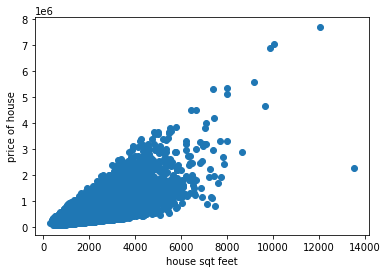

In [7]:
plt.scatter(data_x,data_y)
plt.xlabel("house sqt feet")
plt.ylabel("price of house")

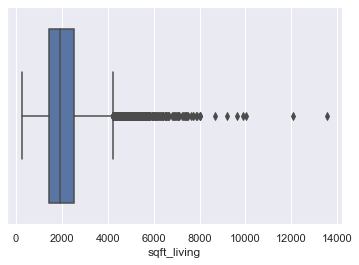

In [8]:
sns.set(style = 'darkgrid')
sns.boxplot(data['sqft_living'])

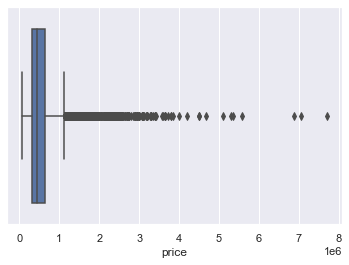

In [9]:
sns.set(style = 'darkgrid')
sns.boxplot(data['price'])

In [10]:

from scipy import stats


data = data[['sqft_living','price']]
z = np.abs(stats.zscore(data))
filter = data[(z < 3).all(axis=1)]
filter

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


In [11]:
print(len(data))
len(filter)

21613


21088

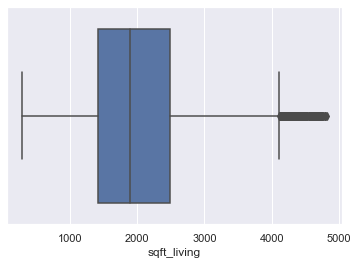

In [12]:
sns.boxplot(x=filter['sqft_living'])

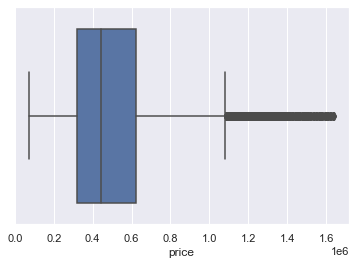

In [13]:

sns.boxplot(x=filter['price'])

In [14]:
data

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


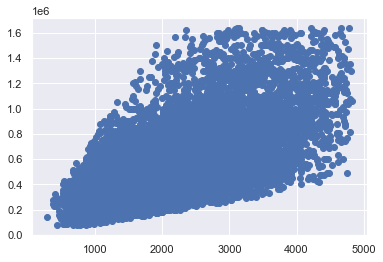

In [15]:
# Visualising data points using a Scatter plot
plt.scatter(filter['sqft_living'],filter['price'])

In [16]:
r1 = data.quantile(0.25)
r3 = data.quantile(0.75)
sqr = r3 - r1
sqr

sqft_living      1123.0
price          323050.0
dtype: float64

In [17]:
print((data < (r1 - sqr*1.5)) | (data > (r3 + sqr*1.5)))

       sqft_living  price
0            False  False
1            False  False
2            False  False
3            False  False
4            False  False
...            ...    ...
21608        False  False
21609        False  False
21610        False  False
21611        False  False
21612        False  False

[21613 rows x 2 columns]


In [18]:
data_cleared = data[~((data < (r1 - 1.5 * sqr)) |(data > (r3 + 1.5 * sqr))).any(axis=1)]
data_cleared.shape

(20292, 2)

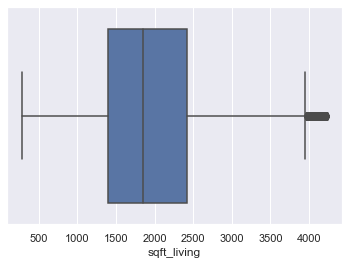

In [19]:
sns.boxplot(x=data_cleared['sqft_living'])

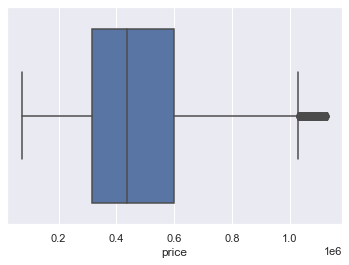

In [20]:
sns.boxplot(x=data_cleared['price'])

In [21]:
data_x = data_cleared['sqft_living']
data_y = data_cleared['price']
old_data=data_cleared.copy()

In [22]:
# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
nmd =[]
for i in range(len(data_x)):
  nmd.append([data_x[i],data_y[i]])

nmd[:5]

[[0.22588832487309646, 0.1395724465558195],
 [0.5786802030456852, 0.4399049881235154],
 [0.1218274111675127, 0.0997624703087886],
 [0.42385786802030456, 0.5026128266033254],
 [0.35279187817258884, 0.41330166270783847]]

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
data_train,data_test = train_test_split(nmd,test_size=0.1)

In [25]:
#training the model

In [26]:
df = pd.DataFrame(data=data_train)

In [27]:
df

,0,1
0,0.439086,0.137767
1,0.182741,0.230879
2,0.507614,0.527316
3,0.352792,0.418052
4,0.256345,0.289786
...,...,...
18257,0.444162,0.743468
18258,0.261421,0.218527
18259,0.175127,0.494062
18260,0.469543,0.166983


In [28]:
ns = df.shape[0]
ns

18262

In [29]:
bs = 1500
nb = np.ceil(len(df)/bs)
nb

13.0

In [31]:
#intialization
n=0.1
i=1 
epochs=100
m=1
c=-1
batch=nb-1
bt=1


In [32]:
while i<=epochs:
    j = 0
  # RUNNING ITERATION FOR N-1 BATCHES
    while (bt <= batch):
        der_m = 0
        der_c = 0
        err = 0
        for k in range(0,bs):
            der_m = der_m + (df[1][j] - (m*df[0][j])-c)*(df[0][j])
            der_c = der_c + (df[1][j] - (m*df[0][j])-c)
            j = j+1
      
  
    
        der_m = (-1/bs)*der_m
        der_c = (-1/bs)*der_c
        change_m = (-1)*n*der_m
        change_c = (-1)*n*der_c
    
        m = m + change_m
        c = c + change_c
        bt = bt + 1
    
 
  # EXECUTING FOR LAST BATCH
    der_m = 0
    der_c = 0
    err = 0
  # FINDING REMAINING NUMBER OF BATCHES
    es = ns - j  
  
    for k in range(j,ns):
        der_m = der_m + (df[1][j] - (m*df[0][j])-c)*(df[0][j])
        der_c = der_c + (df[1][j] - (m*df[0][j])-c)
        j = j + 1
        
    der_m = (-1/es)*der_m
    der_c = (-1/es)*der_c
    
    change_m = (-1)*n*der_m
    change_c = (-1)*n*der_c
  
    m = m + change_m
    c = c + change_c
  
    i = i + 1

        
    
  
print(m,c)

1.1504637483358617 -0.1123686826550974


In [33]:
df['yp']=np.nan

In [34]:
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c


In [35]:
df

,0,1,yp
0,0.439086,0.137767,0.392784
1,0.182741,0.230879,0.097868
2,0.507614,0.527316,0.471623
3,0.352792,0.418052,0.293506
4,0.256345,0.289786,0.182547
...,...,...,...
18257,0.444162,0.743468,0.398624
18258,0.261421,0.218527,0.188387
18259,0.175127,0.494062,0.089108
18260,0.469543,0.166983,0.427824


In [36]:
mse = 0
for i in range(0,ns):
  mse += (df[1][i] -df['yp'][i])**2
mse = mse/ns
mse

0.03291131935356369

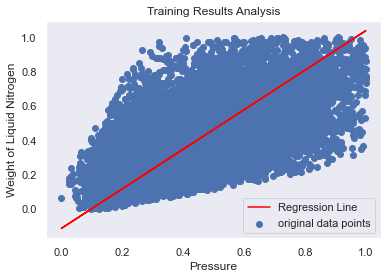

In [44]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [54]:
df = pd.DataFrame(data=data_test)
df
ns = df.shape[0]
ns

2030

In [55]:
df['yp']=np.nan

In [56]:
for i in range(0,ns):
    df['yp'][i]=m*df[0][i]+c
    

In [57]:
df

,0,1,yp
0,0.418782,0.228029,0.369425
1,0.324873,0.332542,0.261386
2,0.538071,0.451306,0.506663
3,0.581218,0.593824,0.556302
4,0.327411,0.213758,0.264306
...,...,...,...
2025,0.139594,0.167221,0.048229
2026,0.606599,0.677435,0.585501
2027,0.357868,0.360095,0.299346
2028,0.197970,0.537292,0.115388


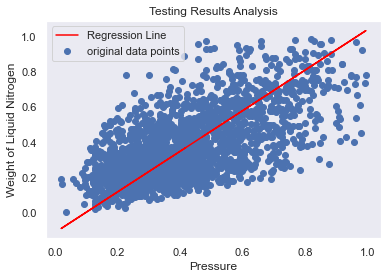

In [59]:
plt.plot(df[0],df['yp'],'red',label="Regression Line")
plt.scatter(df[0],df[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Testing Results Analysis")
plt.show()
%matplotlib inline

In [61]:
min_x = old_data['sqft_living'].min()
max_x = old_data['sqft_living'].max()
min_y = old_data['price'].min()
max_y = old_data['price'].max()
print(min_x,min_y,max_x,max_y)

290 75000.0 4230 1127500.0


In [63]:
x = float(input("enter the square feet :"))
xx = x
x = (x - min_x)/(max_x - min_x)
y = m*x + c
y = y*(max_y - min_y) + min_y
print("price of the house",xx,"sqft is",y)

enter the square feet :1800
price of the house 1800.0 sqft is 420793.7060832959
